In [583]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot  as plt
from sklearn.cluster import KMeans
import warnings
warnings.filterwarnings("ignore")

In [584]:
df=pd.read_csv("C:/Users/varda/Downloads/Mall_Customers.csv")
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


#UNIVARIATE ANALYSIS

In [586]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


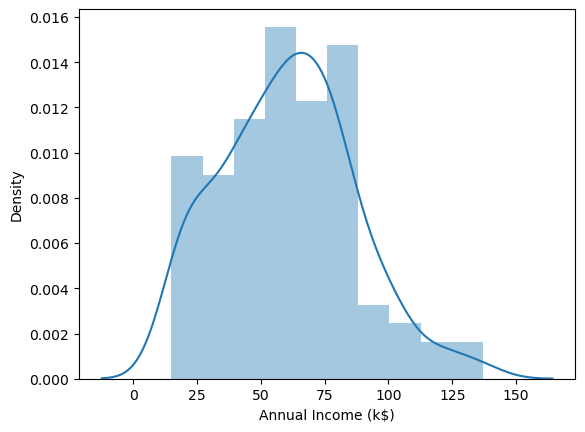

In [587]:
sns.distplot(df['Annual Income (k$)']);

In [588]:
df.columns

Index(['CustomerID', 'Gender', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)'],
      dtype='object')

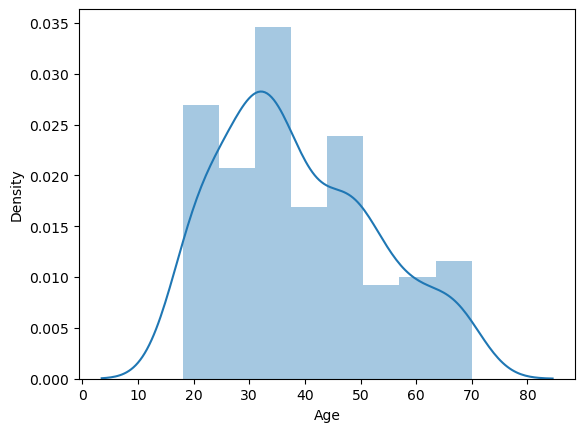

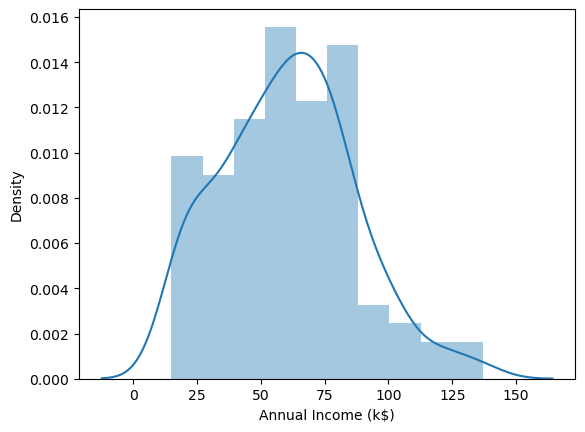

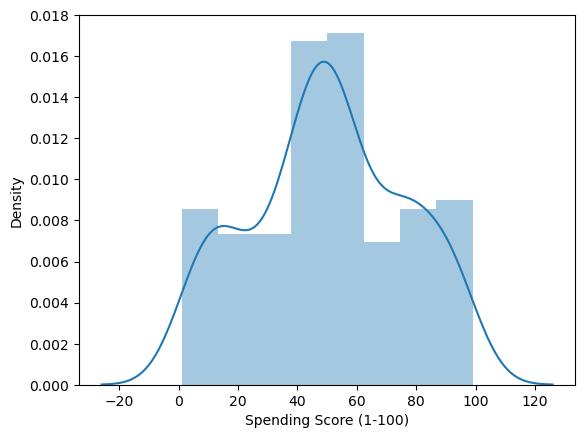

In [589]:
columns=['Age', 'Annual Income (k$)','Spending Score (1-100)']
for i in columns:
    plt.figure()
    sns.distplot(df[i])

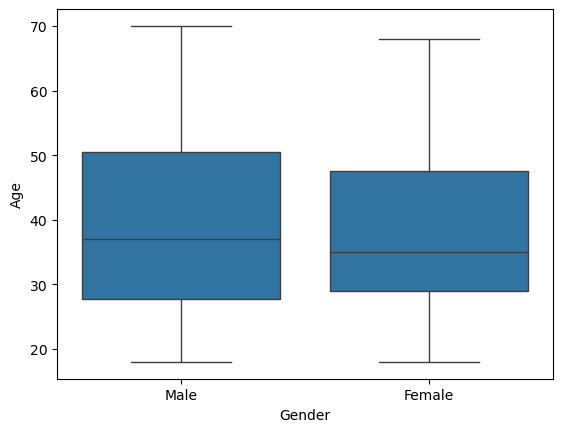

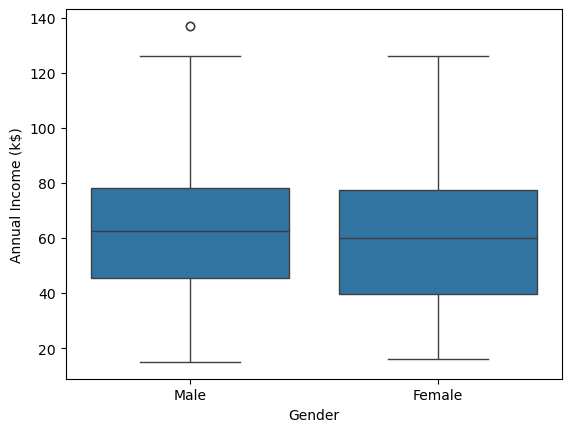

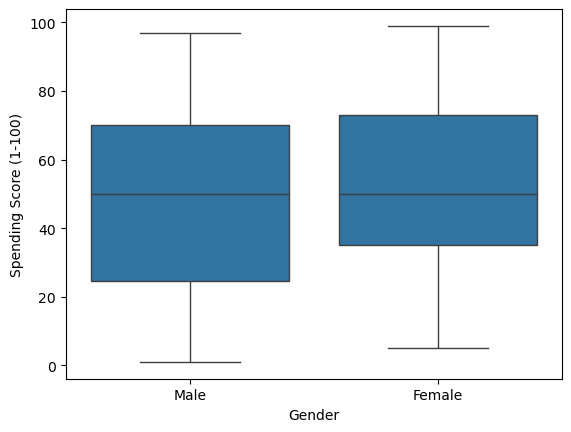

In [590]:
columns=['Age', 'Annual Income (k$)','Spending Score (1-100)']
for i in columns:
    plt.figure()
    sns.boxplot(data=df,x='Gender',y=df[i]);

In [591]:
df['Gender'].value_counts(normalize=True)

Gender
Female    0.56
Male      0.44
Name: proportion, dtype: float64

#BIVARIATE ANALYSIS

In [593]:
df.columns

Index(['CustomerID', 'Gender', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)'],
      dtype='object')

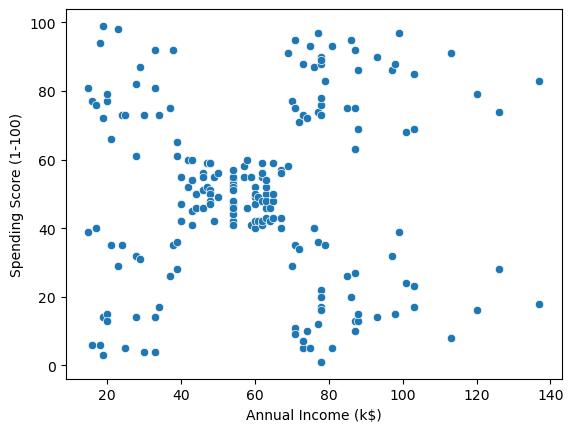

In [594]:
sns.scatterplot(data=df,x='Annual Income (k$)',y='Spending Score (1-100)');

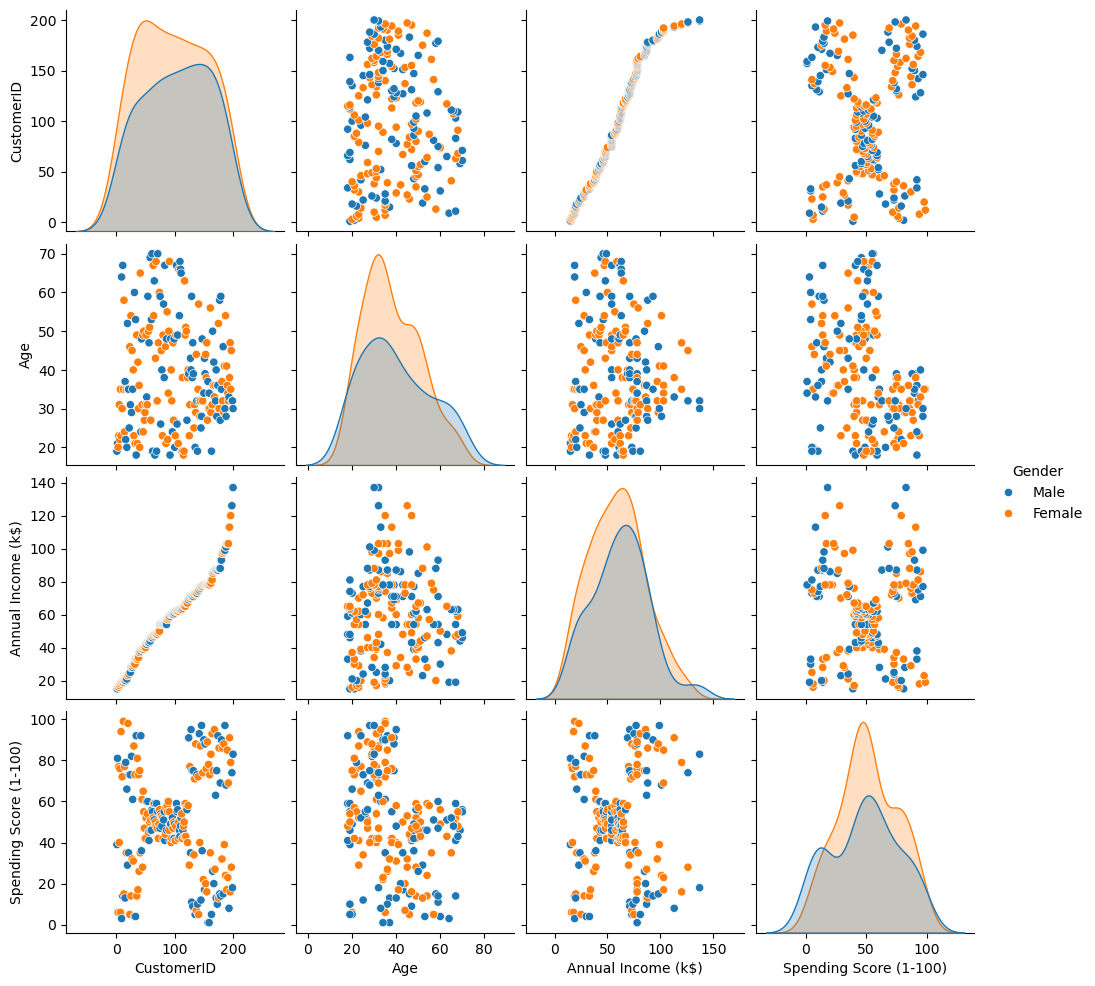

In [595]:
#df=df.drop(['CustomerID'],axis=1)
sns.pairplot(df,hue='Gender')

In [596]:
df.columns

Index(['CustomerID', 'Gender', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)'],
      dtype='object')

In [597]:
#df.groupby(['Gender'])['Age', 'Annual Income (k$)', 'Spending Score (1-100)'].mean()
df.groupby(['Gender'])[['Age', 'Annual Income (k$)','Spending Score (1-100)']].mean()


,Age,Annual Income (k$),Spending Score (1-100)
Gender,,,
Female,38.098214,59.250000,51.526786
Male,39.806818,62.227273,48.511364


In [598]:
df.corr(numeric_only=True)


,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
CustomerID,1.000000,-0.026763,0.977548,0.013835
Age,-0.026763,1.000000,-0.012398,-0.327227
Annual Income (k$),0.977548,-0.012398,1.000000,0.009903
Spending Score (1-100),0.013835,-0.327227,0.009903,1.000000


<Axes: >

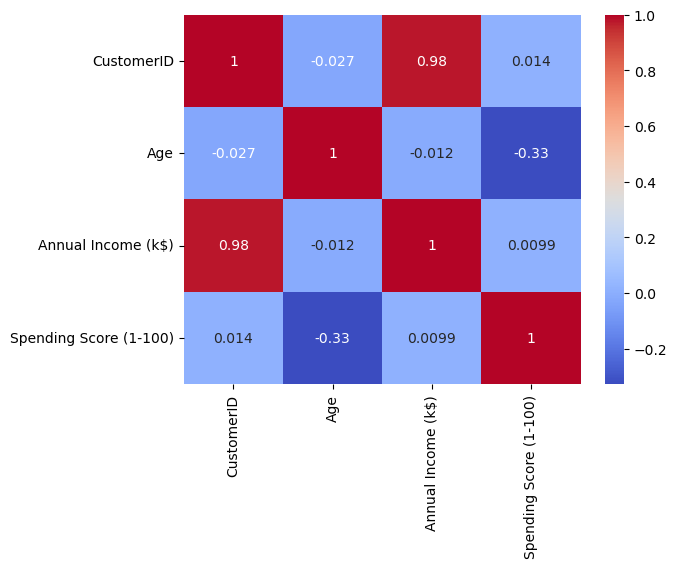

In [599]:
sns.heatmap(df.corr(numeric_only=True),cmap='coolwarm',annot=True)


#CLUSTERING -- UNIVARIETE,BIVARIATE,MULTIVARIATE

In [601]:
clustering1=KMeans(n_clusters=3)

In [602]:
clustering1.fit(df[['Annual Income (k$)']])

KMeans(n_clusters=3)

In [603]:
clustering1.labels_

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2])

In [604]:
df['Income Cluster']=clustering1.labels_


In [605]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Income Cluster
0,1,Male,19,15,39,0
1,2,Male,21,15,81,0
2,3,Female,20,16,6,0
3,4,Female,23,16,77,0
4,5,Female,31,17,40,0


In [606]:
df['Income Cluster'].value_counts()

Income Cluster
1    92
0    72
2    36
Name: count, dtype: int64

#In K-means clustering in Python, inertia_ is an attribute of the KMeans object that stores the sum of squared 
#distances of samples to their closest cluster center. After fitting the KMeans model to the data, inertia_ can 
#be used to evaluate the model by measuring how internally coherent the clusters are. 
#A lower inertia value indicates a better fit because it means that the data points are closer to their respective centroids.

In [608]:
clustering1.inertia_

23528.152173913055

In [609]:
interia_scores=[]
for i in range(1,11):
    kmeans=KMeans(n_clusters=i)
    kmeans.fit(df[['Annual Income (k$)']])
    interia_scores.append(kmeans.inertia_)
    

In [610]:
interia_scores

[137277.28000000003,
 48660.88888888889,
 25640.457784396833,
 15379.639393939397,
 8481.496190476191,
 5795.492712550607,
 4265.950427350428,
 3388.273504273505,
 2208.812049062049,
 1997.5530303030303]

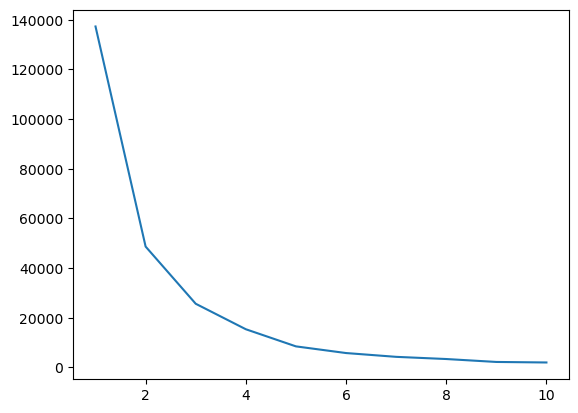

In [611]:
plt.plot(range(1,11),interia_scores)

In [612]:
df.columns

Index(['CustomerID', 'Gender', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)', 'Income Cluster'],
      dtype='object')

In [613]:
df.groupby('Income Cluster')[['Age', 'Annual Income (k$)', 'Spending Score (1-100)',
       'Income Cluster']].mean()

,Age,Annual Income (k$),Spending Score (1-100),Income Cluster
Income Cluster,,,,
0,38.930556,33.027778,50.166667,0.0
1,39.184783,66.717391,50.054348,1.0
2,37.833333,99.888889,50.638889,2.0


#BIVARIATE CLUSTERING

In [615]:
clustering2=KMeans(n_clusters=5)
clustering2.fit(df[['Annual Income (k$)', 'Spending Score (1-100)']])
df['Spending and Income Cluster']=clustering2.labels_
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Income Cluster,Spending and Income Cluster
0,1,Male,19,15,39,0,3
1,2,Male,21,15,81,0,2
2,3,Female,20,16,6,0,3
3,4,Female,23,16,77,0,2
4,5,Female,31,17,40,0,3


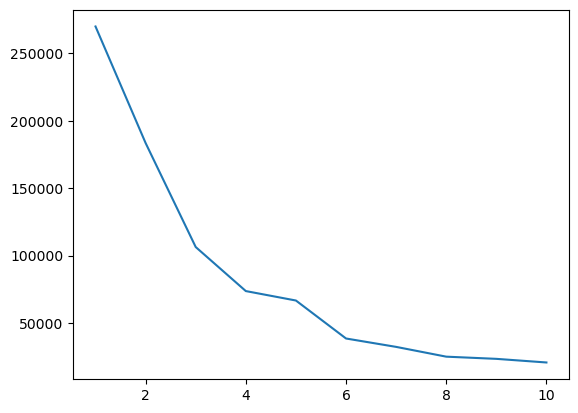

In [616]:
interia_scores2=[]
for i in range(1,11):
    kmeans2=KMeans(n_clusters=i)
    kmeans2.fit(df[['Annual Income (k$)', 'Spending Score (1-100)']])
    interia_scores2.append(kmeans2.inertia_)
plt.plot(range(1,11),interia_scores2)

In [617]:
centers=pd.DataFrame(clustering2.cluster_centers_)
centers.columns=['x','y']
centers

,x,y
0,86.538462,82.128205
1,55.296296,49.518519
2,25.727273,79.363636
3,26.304348,20.913043
4,88.200000,17.114286


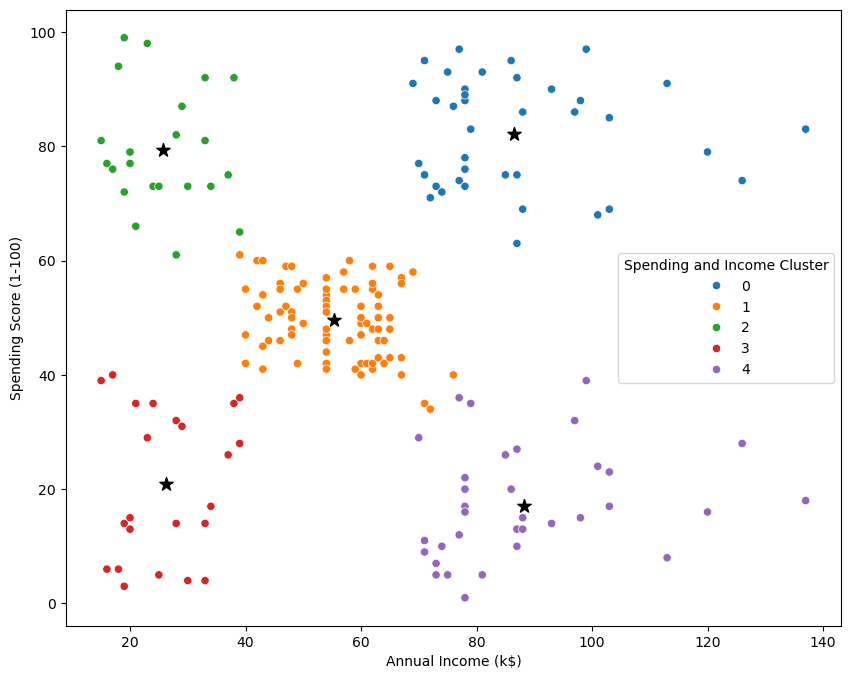

In [618]:
plt.figure(figsize=[10,8])
plt.scatter(x=centers['x'],y=centers['y'],s=100,c='black',marker='*')
sns.scatterplot(data=df,x=df['Annual Income (k$)'], y=df['Spending Score (1-100)'],hue='Spending and Income Cluster',palette='tab10');
plt.savefig("clusering_bivariate.png")

In [619]:
pd.crosstab(df['Spending and Income Cluster'],df['Gender'],normalize='index')

Gender,Female,Male
Spending and Income Cluster,,
0,0.538462,0.461538
1,0.592593,0.407407
2,0.590909,0.409091
3,0.608696,0.391304
4,0.457143,0.542857


In [620]:
df.groupby('Spending and Income Cluster')[['Age', 'Annual Income (k$)', 'Spending Score (1-100)',
       'Income Cluster']].mean()

,Age,Annual Income (k$),Spending Score (1-100),Income Cluster
Spending and Income Cluster,,,,
0,32.692308,86.538462,82.128205,1.461538
1,42.716049,55.296296,49.518519,0.666667
2,25.272727,25.727273,79.363636,0.000000
3,45.217391,26.304348,20.913043,0.000000
4,41.114286,88.200000,17.114286,1.514286


#MULTIVARIATEING CLUSTERING

In [622]:
from sklearn.preprocessing import StandardScaler

In [623]:
scale=StandardScaler()

In [624]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Income Cluster,Spending and Income Cluster
0,1,Male,19,15,39,0,3
1,2,Male,21,15,81,0,2
2,3,Female,20,16,6,0,3
3,4,Female,23,16,77,0,2
4,5,Female,31,17,40,0,3


In [625]:
dff=pd.get_dummies(df,drop_first=True)
dff

,CustomerID,Age,Annual Income (k$),Spending Score (1-100),Income Cluster,Spending and Income Cluster,Gender_Male
0,1,19,15,39,0,3,True
1,2,21,15,81,0,2,True
2,3,20,16,6,0,3,False
3,4,23,16,77,0,2,False
4,5,31,17,40,0,3,False
...,...,...,...,...,...,...,...
195,196,35,120,79,2,0,False
196,197,45,126,28,2,4,False
197,198,32,126,74,2,0,True
198,199,32,137,18,2,4,True


In [626]:
dff.columns

Index(['CustomerID', 'Age', 'Annual Income (k$)', 'Spending Score (1-100)',
       'Income Cluster', 'Spending and Income Cluster', 'Gender_Male'],
      dtype='object')

In [627]:
dff=dff[['Age', 'Annual Income (k$)', 'Spending Score (1-100)', 'Gender_Male']]
dff

,Age,Annual Income (k$),Spending Score (1-100),Gender_Male
0,19,15,39,True
1,21,15,81,True
2,20,16,6,False
3,23,16,77,False
4,31,17,40,False
...,...,...,...,...
195,35,120,79,False
196,45,126,28,False
197,32,126,74,True
198,32,137,18,True


In [628]:
dff=pd.DataFrame(scale.fit_transform(dff))
dff

,0,1,2,3
0,-1.424569,-1.738999,-0.434801,1.128152
1,-1.281035,-1.738999,1.195704,1.128152
2,-1.352802,-1.700830,-1.715913,-0.886405
3,-1.137502,-1.700830,1.040418,-0.886405
4,-0.563369,-1.662660,-0.395980,-0.886405
...,...,...,...,...
195,-0.276302,2.268791,1.118061,-0.886405
196,0.441365,2.497807,-0.861839,-0.886405
197,-0.491602,2.497807,0.923953,1.128152
198,-0.491602,2.917671,-1.250054,1.128152


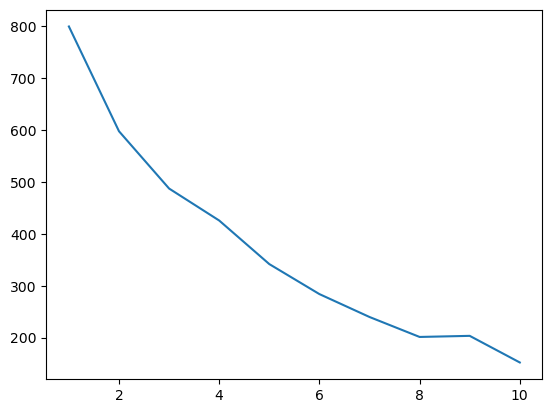

In [629]:
interia_scores3=[]
for i in range(1,11):
    kmeans3=KMeans(n_clusters=i)
    kmeans3.fit(dff)
    interia_scores3.append(kmeans3.inertia_)
plt.plot(range(1,11),interia_scores3)

In [630]:
df

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Income Cluster,Spending and Income Cluster
0,1,Male,19,15,39,0,3
1,2,Male,21,15,81,0,2
2,3,Female,20,16,6,0,3
3,4,Female,23,16,77,0,2
4,5,Female,31,17,40,0,3
...,...,...,...,...,...,...,...
195,196,Female,35,120,79,2,0
196,197,Female,45,126,28,2,4
197,198,Male,32,126,74,2,0
198,199,Male,32,137,18,2,4


In [631]:
df.to_csv("clustering.csv")

Analysis

-Target group would be cluster 0 which has a high spending and high income
- 54 percent of cluster 0 shoppers are women.We should look for ways to attract
    these customers using a marketing campaign targeting popular items in this cluster
- Cluster 2 presents an interesting opportunity to market to the customers for sales
   event on popular items